In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, minimize
from scipy import misc
from sympy import Symbol
from sympy import *

# Минимизация функций

Методом Ньютона найти минимум и максимум унимодальной на отрезке $[a, b]=[0, 3]$ функции $f(x)=x^2-2\sin x$ с точностью $\epsilon=10^{-6}$. Предусмотреть подсчет числа итераций, потребовавшихся для достижения заданной точности.

In [2]:
a = 0
b = 3

def f(x):
    return x**2 - 2 * np.sin(x)

In [3]:
def NewtonsMethod(f, x, tolerance=10e-6):
    it = 0
    while True:
        x_next = x - misc.derivative(f, x, tolerance) / misc.derivative(f, x, tolerance, 2)
        if np.abs(x_next - x) < tolerance:
            break
        x = x_next
        it += 1
    return (x, it)

In [4]:
f_min, it = NewtonsMethod(f, 0)
print('minimum of the function:', f_min, '\nnumber of iterations:', it)

minimum of the function: 0.7390851333758179 
number of iterations: 4


C:\Users\olgai\AppData\Local\Temp\ipykernel_16972\4132403371.py:4: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  x_next = x - misc.derivative(f, x, tolerance) / misc.derivative(f, x, tolerance, 2)


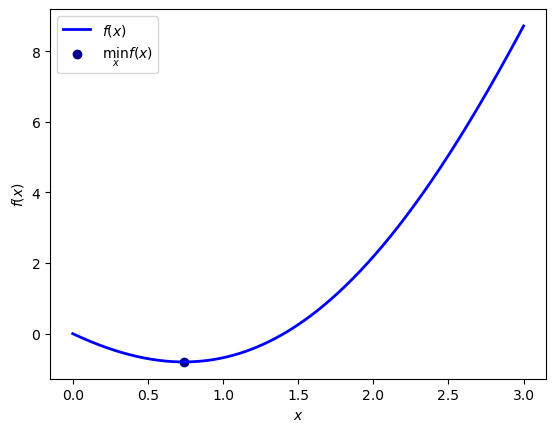

In [5]:
# plt.figure(dpi=200)
x = np.linspace(a, b, 300)
plt.plot(x, f(x), lw=2, color='blue', label='$f(x)$')
plt.scatter(f_min, f(f_min), color='darkblue', label='$\min_x f(x)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
# plt.savefig('newton.jpg')
plt.show()

Функция $f(x)$ представлена частичной суммой ряда $f(x)=\sum\limits_{i=1}^n u_i(x)$, где $u_n(x)=(-1)^{n+1}\frac{\cos (nx)}{n^2-2.5^2}, n=200$. Построить график функции на заданном отрезке $[x_1, x_2] = [0, 3]$ и найти ее минимумы и максимумы с точностью $\epsilon=0.01$ методом Фибоначчи.

In [6]:
x1 = 0
x2 = 3
n = 200
tolerance = 0.01

def g_sum(n, x):
    return (-1)**(n + 1) * (cos(n * x)) / (n**2 - 2.5**2)

In [7]:
def fib(n):
    if n == 0 or n == 1:
        return 1
    return fib(n-1) + fib(n-2)

In [8]:
for N in range(n):
    if (x2 - x1) / fib(N+1) < tolerance:
        break
print(N)

12


In [9]:
def fibMethod(extr, f, x1, x2):
    if extr == 'max':
        coef = -1
    elif extr == 'min':
        coef = 1
    a, b = x1, x2
    for i in range(N):
        alpha = a + (b - a) * fib(N-i-1) / fib(N-i+1)
        beta = a + (b - a) * fib(N-i) / fib(N-i+1)
        if coef * f(alpha) <= coef * f(beta):
            b = beta
            x = alpha
        elif coef * f(alpha) > coef * f(beta):
            a = alpha
            x = beta
    return x

In [10]:
x = Symbol('x')

In [11]:
s = 0
for i in range(n):
    s += g_sum(i, x)
g = lambdify(x, s)

In [12]:
g_min = fibMethod('min', g, x1, x2)
g_max = fibMethod('max', g, x1, x2)
print('minimum of the function:', g_min, '\nmaximum of the function:', g_max)

minimum of the function: 1.2572944297082227 
maximum of the function: 2.5145888594164463


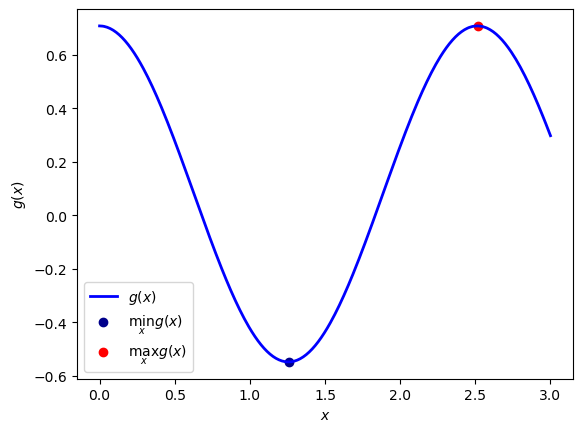

In [14]:
xx = np.linspace(x1, x2, 300)
# plt.figure(dpi=200)
plt.plot(xx, g(xx), lw=2, color='blue', label='$g(x)$')
plt.scatter(g_min, g(g_min), color='darkblue', label='$\min_x g(x)$')
plt.scatter(g_max, g(g_max), color='red', label='$\max_x g(x)$')
plt.xlabel('$x$')
plt.ylabel('$g(x)$')
plt.legend()
# plt.savefig('fib.jpg')
plt.show()

Найти минимум функции 2-x переменных $f(x, y)=x^2+3y^2-7\sin x-y$ с точностью $\varepsilon=10^{-6}$ на прямоугольнике $[x_1, x_2]\times [y_1, y_2] = [-2, 4]\times [-4, 4]$.

In [15]:
x1 = -2
x2 = 4
y1 = -4
y2 = 4

def f2(x):
    return x[0]**2 + 3 * x[1]**2 - 7 * np.sin(x[0]) - x[1]

In [16]:
res = minimize(f2, [1, 0], method='Nelder-Mead', tol=10e-6)
print('minimum of the function:', res.x)

minimum of the function: [1.2159766  0.16666895]


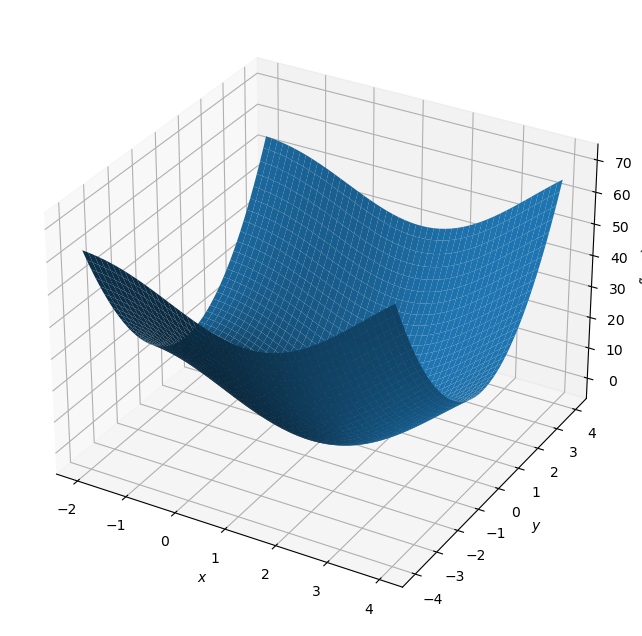

In [17]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(x1, x2, 300), np.linspace(y1, y2, 300))
ax.plot_surface(x, y, f2([x, y]))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x, y)$')
# plt.savefig('3d.jpg')
plt.show()

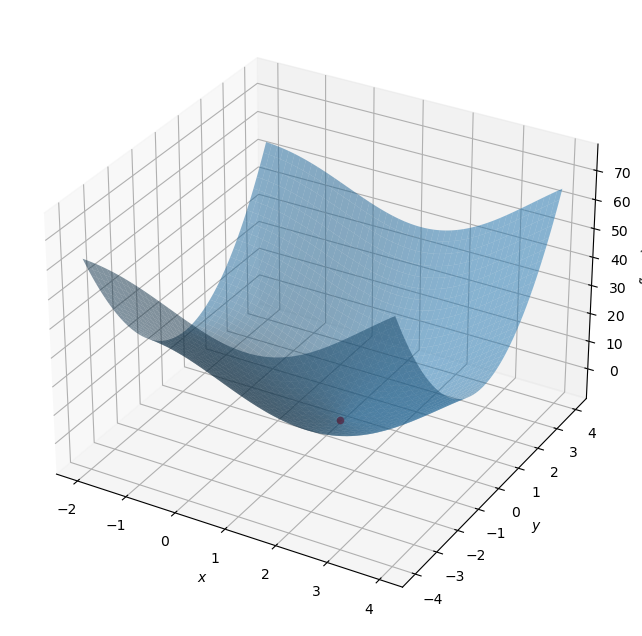

In [18]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(x1, x2, 300), np.linspace(y1, y2, 300))
ax.plot_surface(x, y, f2([x, y]), alpha=0.5)
ax.scatter(*res.x, f2(res.x), color='red')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x, y)$')
# plt.savefig('3dmin.jpg')
plt.show()

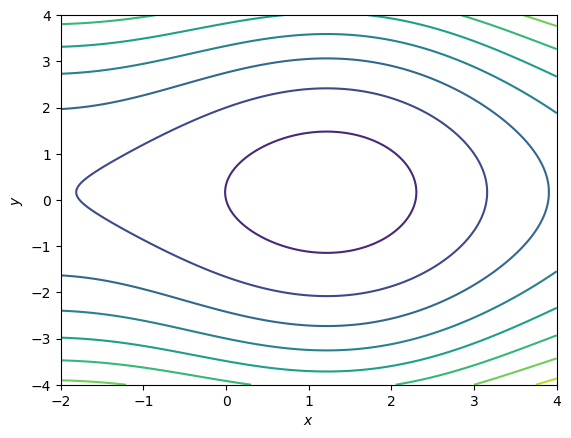

In [19]:
# plt.figure(dpi=200)
plt.contour(x, y, f2([x, y]))
plt.xlabel('$x$')
plt.ylabel('$y$')
# plt.savefig('contour.jpg')
plt.show()

Методом покоординатного спуска найти минимум квадратичной функции $f(x, y)=a_{11}x^2+2a_{12}xy+a_{22}y^2+2a_{13}x+2a_{23}y= 2.5x^2-xy+2y^2-12x+0.5y$  с точностью $\varepsilon=10^{-6}$. Для решения задачи одномерной минимизации использовать метод Ньютона. Построить график функции $f$. Предусмотреть подсчет числа итераций, потребовавшихся для достижения заданной точности.

In [20]:
a11 = 2.5
a12 = -1 / 2
a22 = 2
a13 = -12 / 2 
a23 = 0.5 / 2
b1 = -a13
b2 = -a23

In [21]:
def g2(x):
    return a11 * x[0]**2 + 2 * a12 * x[0] * x[1] + a22 * x[1]**2 + 2 * a13 * x[0] + 2 * a23 * x[1]

In [22]:
def coordinate_descent(x0, tolerance=10e-6):
    x = [[], []]
    for i in range(100):
        x1 = 1 / a11 * (b1 - a12 * x0)
        x2 = 1 / a22 * (b2 - a12 * x1)
        x0 = x2
        x[0].append(x1)
        x[1].append(x2)
        if len(x[0]) > 1:
            if np.abs(x[0][-1] - x[0][-2]) < tolerance and np.abs(x[1][-1] - x[1][-2]) < tolerance:
                break
    return (x1, x2, i)

In [23]:
g2_min = coordinate_descent(0)[:2]
it = coordinate_descent(0)[-1]
print('minimum of the function:', g2_min, '\nnumber of iterations:', it)

minimum of the function: (2.49999996875, 0.4999999921875) 
number of iterations: 5


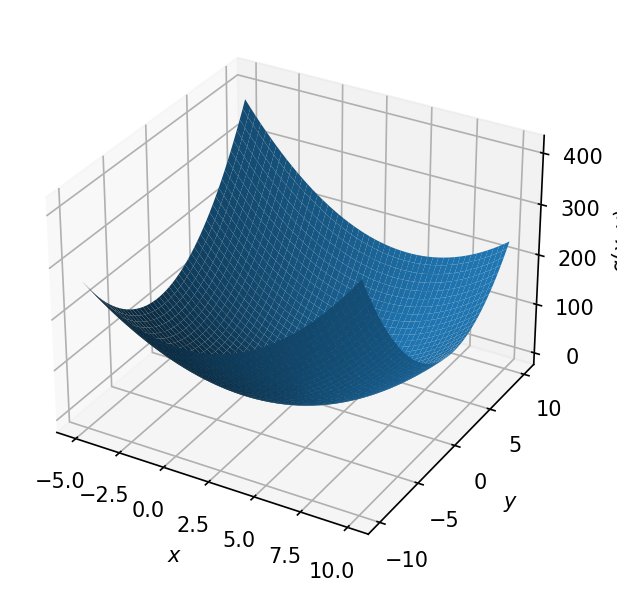

In [28]:
x, y = np.meshgrid(np.linspace(-5, 10, 300), np.linspace(-10, 10, 300))
fig = plt.figure(dpi=150)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x, y, g2([x, y]))
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$g(x, y)$')
# plt.savefig('3dg.jpg')
plt.show()

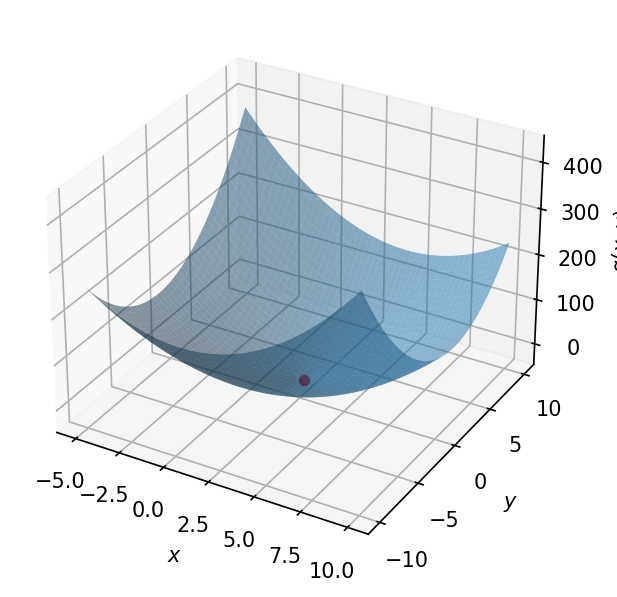

In [29]:
x, y = np.meshgrid(np.linspace(-5, 10, 300), np.linspace(-10, 10, 300))
fig = plt.figure(dpi=150)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x, y, g2([x, y]), alpha=0.5)
ax.scatter(*g2_min, g2(g2_min), color='red')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$g(x, y)$')
# plt.savefig('3dgmin.jpg')
plt.show()

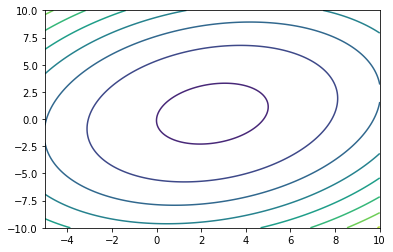

In [388]:
plt.contour(x, y, g2([x, y]))
plt.show()